In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to fit the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalize the input data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Create a Sequential model
model = Sequential()

# Add convolutional layers, max pooling layers, and fully connected layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/10
270/270 [==============================] - 43s 157ms/step - loss: 0.2784 - accuracy: 0.9211 - val_loss: 0.0659 - val_accuracy: 0.9825
Epoch 2/10
270/270 [==============================] - 41s 153ms/step - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.0506 - val_accuracy: 0.9873
Epoch 3/10
270/270 [==============================] - 43s 158ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0386 - val_accuracy: 0.9892
Epoch 4/10
270/270 [==============================] - 41s 151ms/step - loss: 0.0364 - accuracy: 0.9884 - val_loss: 0.0370 - val_accuracy: 0.9902
Epoch 5/10
270/270 [==============================] - 43s 159ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0359 - val_accuracy: 0.9900
Epoch 6/10
270/270 [==============================] - 41s 151ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 7/10
270/270 [==============================] - 41s 152ms/step - loss: 0.0195 - accuracy: 0.9942 - val_loss: 0.0347 - val_ac

In [ ]:
h=history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

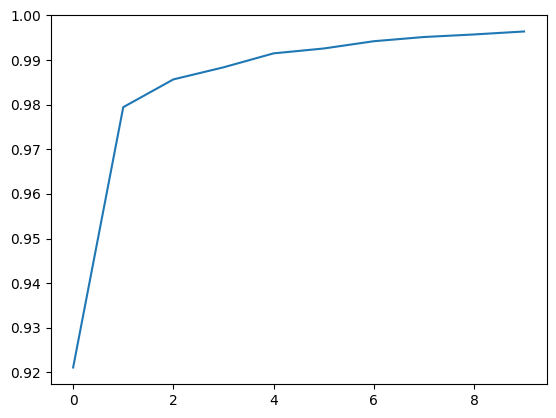

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.show()

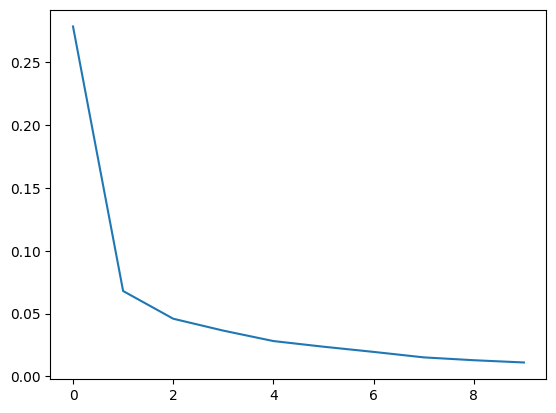

In [ ]:
plt.plot(h['loss'])
plt.show()